In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

### Generar datos de ejemplo

In [17]:
# Generar fechas
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=365, freq="D")

# Generar tendencia y estacionalidad
trend = np.linspace(50, 200, 365)  # Tendencia creciente
seasonality = 20 * np.sin(2 * np.pi * dates.dayofyear / 7)  # Patrón semanal

# Añadir ruido aleatorio
noise = np.random.normal(scale=10, size=365)

# Crear DataFrame con datos simulados
df = pd.DataFrame({
    "ds": dates,
    "y": trend + seasonality + noise
})

# Mostrar datos
df.head()

,ds,y
0,2023-01-01,70.603771
1,2023-01-02,68.528003
2,2023-01-03,65.978736
3,2023-01-04,57.788888
4,2023-01-05,29.808260


### Inicializar y ajustar el modelo

A mayor sea el nivel de confianza sea mayor, por ejemplo 95%, esto hará que **el área azul claro sea más ancha**, porque el modelo quiere asegurarse de que en el 95% de los casos, la predicción incluirá el valor real.

In [18]:
model = Prophet(interval_width=0.95)
model.fit(df)

13:17:53 - cmdstanpy - INFO - Chain [1] start processing
13:17:54 - cmdstanpy - INFO - Chain [1] done processing


### Hacer predicciones

In [19]:
# Crear dataframe con fechas futuras para predicción (90 días)
future = model.make_future_dataframe(periods=90)

# Generar predicciones
forecast = model.predict(future)

# Mostrar primeras filas de la predicción
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2023-01-01,63.721033,45.939169,82.926318
1,2023-01-02,70.179668,51.487483,87.155241
2,2023-01-03,56.743888,38.503080,76.224385
3,2023-01-04,41.966870,23.635462,57.637657
4,2023-01-05,30.319169,12.709644,49.751533


### Visualizar predicciones

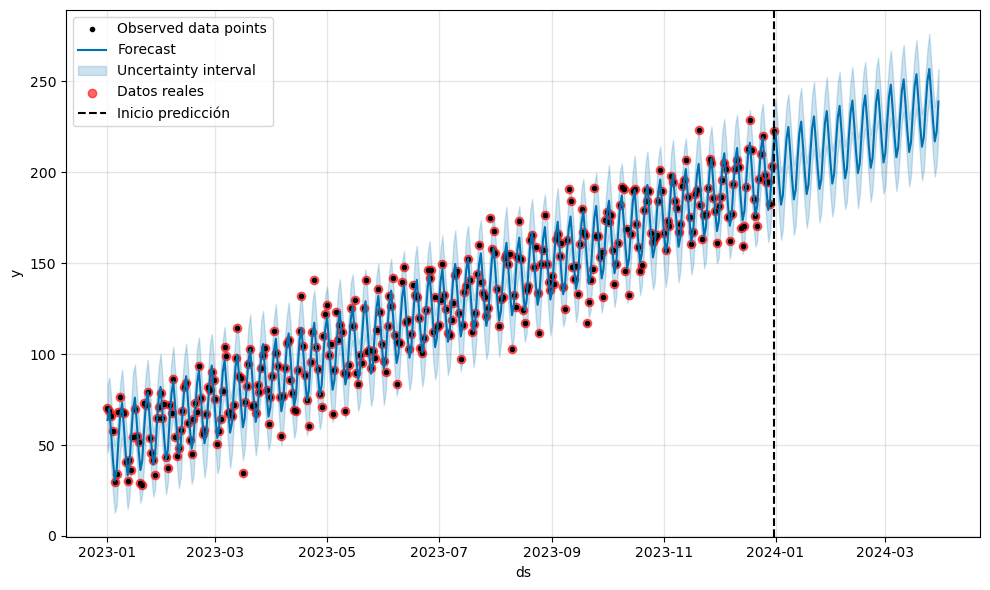

In [20]:
# Graficar la predicción de Prophet con datos reales resaltados
fig = model.plot(forecast)

# Obtener los ejes del gráfico
ax = fig.gca()

# Resaltar los datos históricos
ax.scatter(df['ds'], df['y'], color='red', label="Datos reales", alpha=0.6)

# Añadir una línea vertical para indicar el inicio de la predicción
ax.axvline(x=df['ds'].max(), color='black', linestyle="dashed", label="Inicio predicción")

# Agregar leyenda
ax.legend()

plt.show()

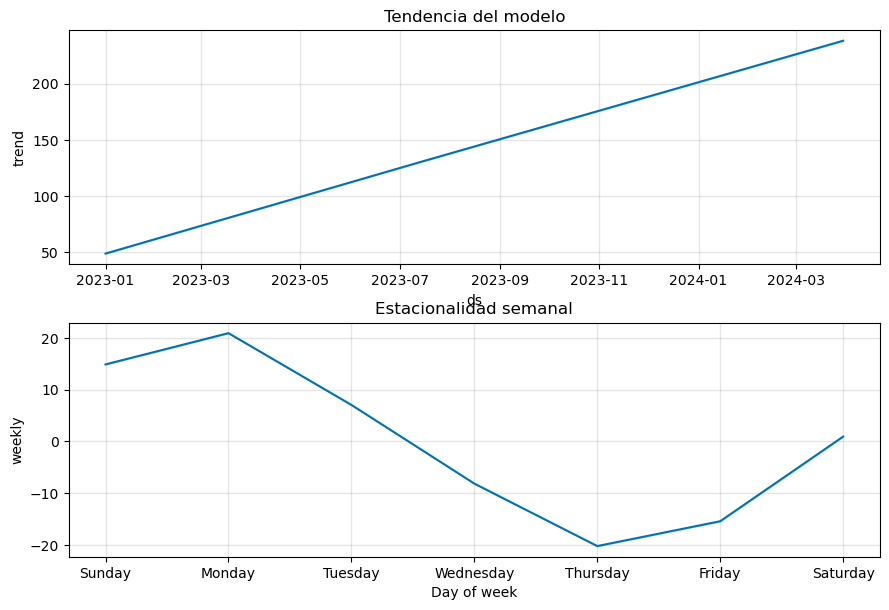

In [21]:
import matplotlib.pyplot as plt

# Graficar los componentes
fig = model.plot_components(forecast)

# Añadir títulos y leyenda manualmente
axes = fig.get_axes()  # Obtiene los ejes de cada subplot

# Modificar cada subplot individualmente
axes[0].set_title("Tendencia del modelo")
axes[1].set_title("Estacionalidad semanal")
if len(axes) > 2:
    axes[2].set_title("Estacionalidad anual")  # Si hay estacionalidad anual

# Mostrar la figura
plt.show()